In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('final_cccf.csv')
dat=data.dropna(subset=['cc_rating','cf_rating'])

In [3]:

x=dat['cc_rating'].values
y=dat['cf_rating'].values
x_mean=np.mean(x)
y_mean=np.mean(y)
numerator=np.sum((x-x_mean)*(y-y_mean))
denominator=np.sum((x-x_mean)**2)
w=numerator/denominator
b=y_mean - w*x_mean
def cc_to_cf(cc):
    return w*cc+ b
print(w)
print(b)


0.8315620555789337
-32.62926507315842


In [4]:
x1=dat['cf_rating'].values
y1=dat['cc_rating'].values
x1_mean=np.mean(x1)
y1_mean=np.mean(y1)
numerator=np.sum((x1-x1_mean)*(y1-y1_mean))
denominator=np.sum((x1-x1_mean)**2)
w1=numerator/denominator
b1=y1_mean - w1*x1_mean
def cf_to_cc(cf):
    return w1*cf+ b1
print(w1)
print(b1)

0.46912877135387615
1044.636309055616


In [5]:
for idx,row in data.iterrows():
    if(pd.notna(row['cc_rating'])):
        data.at[idx,'cf_rating']=cc_to_cf(row['cc_rating'])
    if(pd.notna(row['cf_rating'])):
        data.at[idx,'cc_rating']=cf_to_cc(row['cf_rating'])

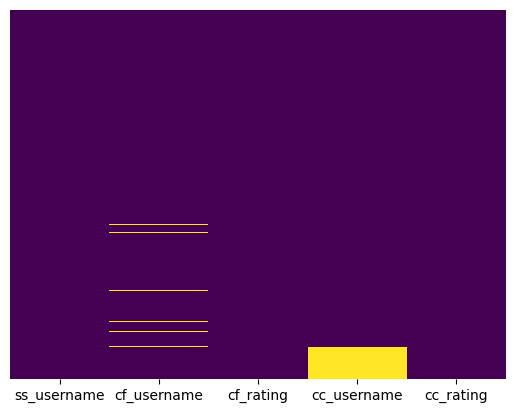

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)
plt.show()

In [7]:
for z in range(700,2100,50):
    print("Codechef :",z,"Codeforces :",round(cc_to_cf(z),2))

Codechef : 700 Codeforces : 549.46
Codechef : 750 Codeforces : 591.04
Codechef : 800 Codeforces : 632.62
Codechef : 850 Codeforces : 674.2
Codechef : 900 Codeforces : 715.78
Codechef : 950 Codeforces : 757.35
Codechef : 1000 Codeforces : 798.93
Codechef : 1050 Codeforces : 840.51
Codechef : 1100 Codeforces : 882.09
Codechef : 1150 Codeforces : 923.67
Codechef : 1200 Codeforces : 965.25
Codechef : 1250 Codeforces : 1006.82
Codechef : 1300 Codeforces : 1048.4
Codechef : 1350 Codeforces : 1089.98
Codechef : 1400 Codeforces : 1131.56
Codechef : 1450 Codeforces : 1173.14
Codechef : 1500 Codeforces : 1214.71
Codechef : 1550 Codeforces : 1256.29
Codechef : 1600 Codeforces : 1297.87
Codechef : 1650 Codeforces : 1339.45
Codechef : 1700 Codeforces : 1381.03
Codechef : 1750 Codeforces : 1422.6
Codechef : 1800 Codeforces : 1464.18
Codechef : 1850 Codeforces : 1505.76
Codechef : 1900 Codeforces : 1547.34
Codechef : 1950 Codeforces : 1588.92
Codechef : 2000 Codeforces : 1630.49
Codechef : 2050 Codef

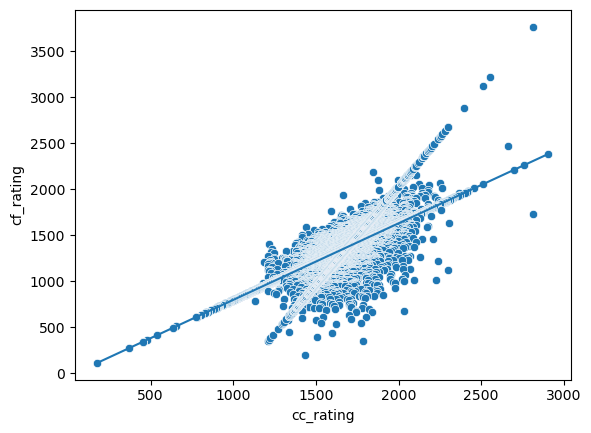

In [8]:
ax=sns.scatterplot(x='cc_rating',y='cf_rating',data=data)
cc_range=np.linspace(data['cc_rating'].min(),data['cc_rating'].max(),num=500)
ax.plot(cc_range,cc_to_cf(cc_range))
plt.show()

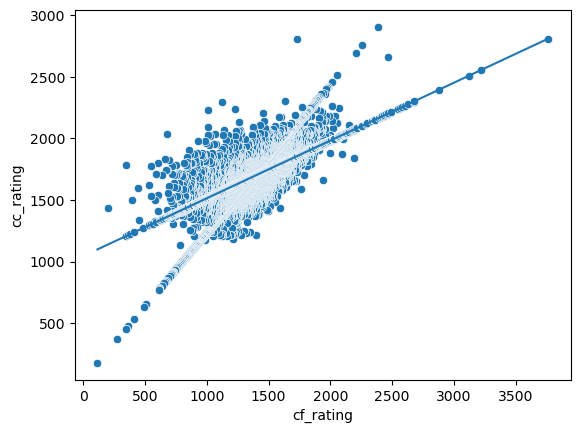

In [9]:
ax=sns.scatterplot(x='cf_rating',y='cc_rating',data=data)
cf_range=np.linspace(data['cf_rating'].min(),data['cf_rating'].max(),num=500)
ax.plot(cf_range,cf_to_cc(cf_range))
plt.show()